# Filtering in the Frequency Domain

## Part 1 - DFT and IDFT


In [1]:
import numpy as np
import sys,os
ea979path = os.path.abspath('../../')
if ea979path not in sys.path:
    sys.path.append(ea979path)
import ea979.src as ia
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import skimage.filters as skf

First let's calculate the DFT of the image using the *np.fft2* method. ([see documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft2.html)). And to view the images spectrum, we use the *dftview* method from the ea979 library ([see ea979/dftview](../src/dftview.ipynb)).

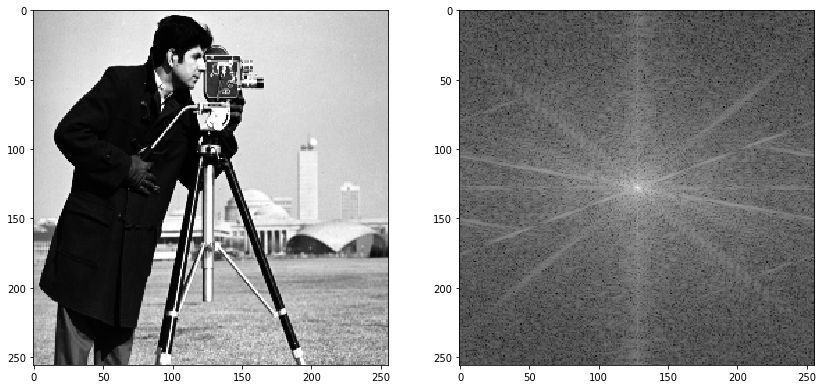

In [2]:
f = mpimg.imread('../data/cameraman.tif') #changed to cameraman.tif to follow above: "usaremos a imagem do cameraman"

F = np.fft.fft2(f) #apply fft to original image
plt.figure(1, figsize=(14,8))

plt.subplot(1,2,1)
plt.imshow(f, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ia.dftview(F), cmap='gray')

### 1.1 Viewing the DFT in different ways

First, let's see what happens when we execute a Discrete Fourier Transform (DFT) on an image, but don't shift the result and don't apply a logarithmic transformation.

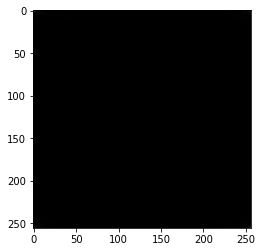

In [3]:
F = np.absolute(np.fft.fft2(f))  #apply fft to original image and take abs value to not have complex data
F *= 255.0 / F.max() #normalize between 0 and 255

plt.imshow(F, cmap = 'gray')


As we can see, we have not yet obtained the images spectrum (as desired). We can see that the DC-value is by far the largest component of the image. However, the dynamic range of the Fourier coefficients (i.e. the intensity values in the Fourier image) is too large to be displayed on the screen, therefore all other values appear as black.

   Now we want to center the DC component. If we consider the Fourier Transform: 
![fourier.PNG](fourier.PNG)
      The value F(0,0) is refered to as the dc coefficient. If u=v=0: 
![fourier2.PNG](fourier2.PNG)
    Basically, F(0,0) is the average intensity of the image. To center this component we need to shift the above result, to center the DFT spectrum. Basically, what this shift does is swap the four quadrants. The above result looks like this: 
![original.PNG](original.PNG) 
    After the shift, we will have:
![swap.PNG](swap.PNG)

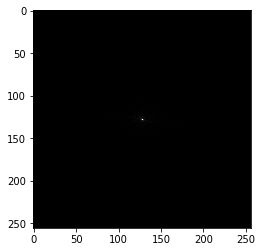

In [4]:
F = np.fft.fftshift(F) #apply shift to the previous image

plt.imshow(F, cmap = 'gray')

As we can see, the shift has centered the DFT spectrum (we can now see F(0,0).

Now, let's re-execute the ia.dftview method on our original image ("f"). Remember that this method does what was done above, but also applies a logarithmic transformation, to obtain the desired spectrum below:

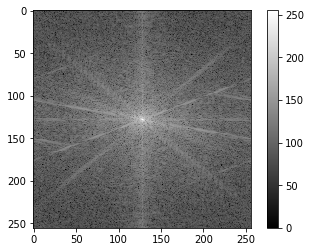

In [5]:
F = ia.dftview(np.fft.fft2(f)) #apply fft to original image, apply log transf., take absolute value, and shift
plt.imshow(F, cmap = 'gray')
plt.colorbar()

As we can see, the result shows that the image contains components of all frequencies, but their magnitude gets smaller for higher frequencies. This means that, in our original image, there is more information contained in the lower frequencies. We acan also see the dominating directions, which originate from the more common patterns in the image.

### 1.2 Calculating the IDFT

Now, let's try to obtain the original image, by running an Inverse DFT on the spectrum above.

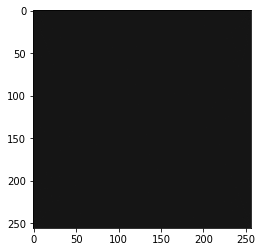

In [6]:
F=np.fft.ifft2(F) #apply inverse fft on spectrum above

plt.imshow(F.real.astype(np.float),cmap='gray');

As expected, the IDFT is not enough to obtain our original image. This is because we obtained the spectrum using the ia.dftview method on the fft of our original image "f". Remember that one of the things this method does is take the complex data matrix which results from the FFT and take the element-by-element absolute value. This is fine for obtaining our magnitude spectrum.

The problem though, is that by doing so, we lose the phase, which is critical information for obtaining the original image. Without it, the best we can do is obtain an image with the same frequencies (and amount of frequencies) as the original input image. 

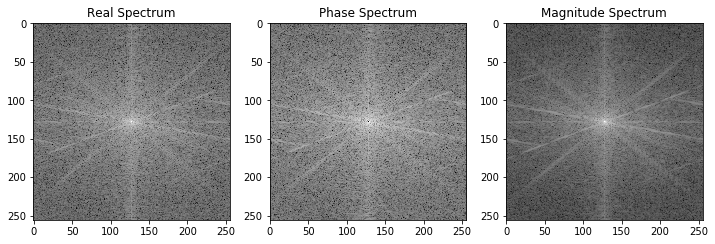

In [7]:
A = np.fft.fft2(f).real #store real part of the fft of the original image
B = np.fft.fft2(f).imag #store imaginary part of the fft of the original image
G = np.fft.fft2(f) #store fft of the imaginary image (complex data matrix)

#view Real, Phase, and Magnitude spectrums
A = ia.dftview(A)
B = ia.dftview(B)
G = ia.dftview(G)

plt.subplots(1,3,figsize=(12,12))
plt.subplot(131)
plt.title('Real Spectrum')
plt.imshow(A, cmap = 'gray')
plt.subplot(132)
plt.title('Phase Spectrum')
plt.imshow(B, cmap = 'gray')
plt.subplot(133)
plt.title('Magnitude Spectrum')
plt.imshow(G, cmap = 'gray')

This means that if we want to analyse the magnitude spectrum but still be able to recover the original image, we must store the real and the imaginary parts of the FFT:

Text(0.5, 1.0, 'Recovered Image')

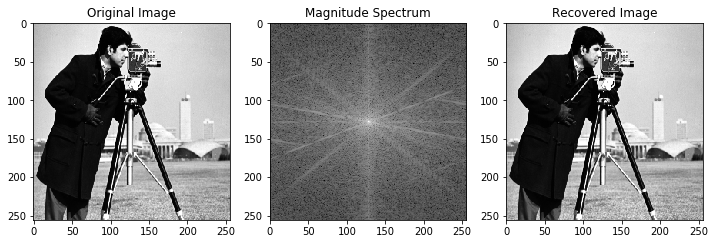

In [8]:
plt.subplots(1,3,figsize=(12,12))

#view original image
plt.subplot(131)
plt.imshow(f, cmap = 'gray')
plt.title('Original Image')

A = np.fft.fft2(f) #store fft of original image
G = ia.dftview(A) #store Magnitude spectrum of image

plt.subplot(132)
plt.imshow(G, cmap = 'gray')
plt.title('Magnitude Spectrum')

#recover original image from fft with the inverse fft
f2 = np.empty(A.shape, dtype=complex)
f2 = np.abs(np.fft.ifft2(A))

plt.subplot(133)
plt.imshow(f2, cmap = 'gray')
plt.title('Recovered Image')

As you can see, in the above code, we obtained the spectrum of the image and, since we stored the complex matrix returned by the FFT, we do not rid ourselves of the phase information. This enables us to recover the original image, as shown above. Now let's check to see if the recovered image matches the original image, exactly.

In [9]:
#np.set_printoptions(threshold=np.inf) #uncomment to print entire arrays
#compare original and recovered images element by element
if f2.all == f.all:
    print('true')
else: print(f2-f)

[[ 0.00000000e+00  2.84217094e-14  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.84217094e-14  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.84217094e-14]
 [ 0.00000000e+00  2.84217094e-14  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.84217094e-14]
 ...
 [ 0.00000000e+00  2.84217094e-14  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  2.84217094e-14]
 [ 0.00000000e+00  2.84217094e-14  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.84217094e-14  0.00000000e+00 -2.84217094e-14 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Apparently, the recovered image is not a perfect match. It is however, completely acceptable. We can say that due to the element-by-element difference matrix printed above. As you can see, the elements are all null or so small that we could, without a problem, say that they are zero. Which means that there is no practical difference between the original and the recovered image.

## Part 2 - Filtering Images in the Frequency Domain

To filter in the frequency domain, we make use of the Convolution Theorem, which guarantees that convolving in the time domain is equivalent to mulitplication in the frequency domain.

This means that, instead of applying a spacial filter by convolving the image $f(x,y)$ with a certain mask $h(x,y)$, we multiply the Fourier Transform of the Image $F(u,v)$ by the Fourier Transform of the mask $H(u,v)$. 

### 2.1 Creating a filter in the Frequency Domain

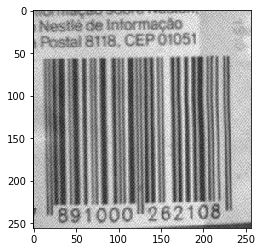

In [10]:
f = mpimg.imread('../data/barcode.tif') #part 1 reads: "usaremos a imagem do cameraman" (barcode was not used in part 1)
plt.imshow(f,cmap = 'gray')             # but since 2.1 says to use the barcode image, we use barcode.tif in this section

Below, we created a function to generate binary images which will act as our ideal (circular) Low and High Pass Filters:

In [11]:
# Creates ideal frequence domain filter (circle)
def cria_filtro_ideal(f, r1, r2):
        
    x,y = f.shape
    
    c1=ia.circle(f.shape, r1, np.divide(f.shape, 2))
    c2=ia.circle(f.shape, r2, np.divide(f.shape, 2))
    
    H = np.logical_xor(c1,c2)
    H = ia.ptrans(H,(x//2,y//2))
    H[0,0] = 1 #correct F(0,0)
    return H

Now, let's create Low Pass and High Pass filters using the above method and see how they affect our image:

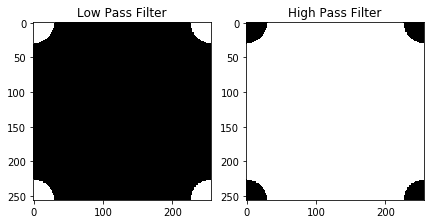

In [12]:
LPF = cria_filtro_ideal(f,0,30) #create Low Pass Filter (LPF)
HPF = 1 - cria_filtro_ideal(f,0,30) #create High Pass Filter (HPF) - inverse of low pass

#show the filters created
plt.subplots(1,2,figsize=(7,7))

plt.subplot(121)
plt.title('Low Pass Filter')
plt.imshow(LPF, cmap = 'gray')

plt.subplot(122)
plt.title('High Pass Filter')
plt.imshow(HPF, cmap = 'gray')

Of course, if we needed, we can apply a shift to the above filters to view the actual centered circles. But there is no need to do so.

### 2.2 Filtering Images in the Frequency Domain

Now let's apply these filters to the image and see what happens:

Text(0.5, 1.0, 'Filtered image')

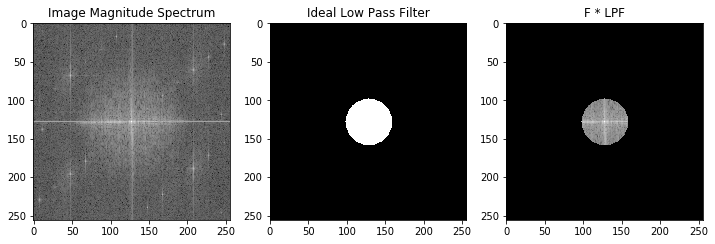

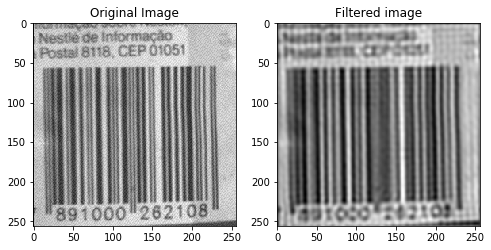

In [13]:
F = np.fft.fft2(f) #apply fft to original image
G = F * LPF #multiply the fft of original image witht the LPF (Convolution in time == mulitplication in frequency)
F2 = np.fft.ifft2(G) #get inverse fft of the filtered image (obtain filtered image in time domain)

#show the magnitude spectrum, the filter, there product, and the output image
plt.figure(1, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(ia.dftview(F), cmap = 'gray')
plt.title('Image Magnitude Spectrum')

plt.subplot(1,3,2)
plt.imshow(np.fft.fftshift(LPF),cmap='gray')
plt.title('Ideal Low Pass Filter')

plt.subplot(1,3,3)
plt.imshow(ia.dftview(G),cmap='gray')
plt.title('F * LPF')

plt.figure(2, figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(f, cmap = 'gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(F2.real.astype(np.float),cmap='gray');
plt.title('Filtered image')

As expected, the image is blurred by the low pass filter. Naturally, the smaller the radius of the filter, the more blurred it will become.

Text(0.5, 1.0, 'Filtered image')

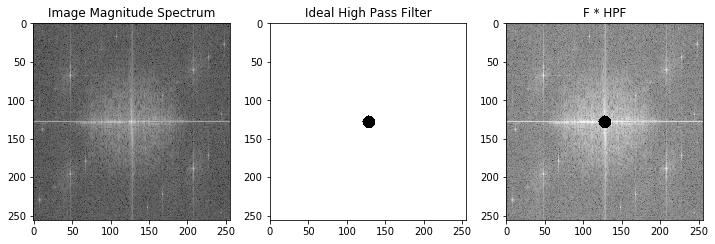

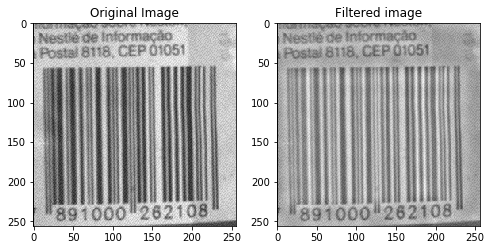

In [14]:
HPF = 1 - cria_filtro_ideal(f,0,8) # decrease HPF size to visualize "sharpening" effect without losing too much of the original image

F = np.fft.fft2(f) #apply fft to original image
G = F * HPF #multiply the fft of original image witht the HPF (Convolution in time == mulitplication in frequency)
F2 = np.fft.ifft2(G) #get inverse fft of the filtered image (obtain filtered image in time domain)

#show the magnitude spectrum, the filter, there product, and the output image
plt.figure(1, figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(ia.dftview(F), cmap = 'gray')
plt.title('Image Magnitude Spectrum')

plt.subplot(1,3,2)
plt.imshow(np.fft.fftshift(HPF),cmap='gray')
plt.title('Ideal High Pass Filter')

plt.subplot(1,3,3)
plt.imshow(ia.dftview(G),cmap='gray')
plt.title('F * HPF')

plt.figure(2, figsize=(8,8))
plt.subplot(1,2,1)
plt.imshow(f, cmap = 'gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(F2.real.astype(np.float),cmap='gray');
plt.title('Filtered image')

As expected, the high pass filter sharpens the image in the sense that it emphasizes details in the images related to quick changes (high frequency), such as borders. Naturally, the smaller the image, the less focus on details there is (image looks more like the original). An example of this: radius 30 produces the image above, which is very different from the original. But if you try a radius such as 3, the image is very close to the original, but a bit "sharpened".

## Part 3 - Recovering a *halftone* Image

The followging image was created with a technique calle halftoning. This technique simulates the ilusion of a constant tone by reproducing many dots in a size not easily observed.

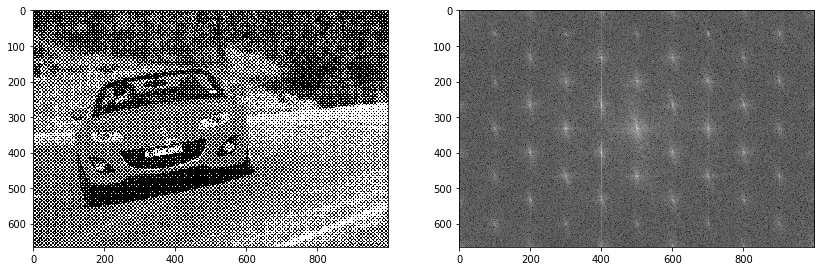

In [15]:
f2 = mpimg.imread('../data/halftone.png')

F2 = np.fft.fft2(f2) #apply fft to halftone image
plt.figure(1, figsize=(14,8))

#show image and spectrum
plt.subplot(1,2,1)
plt.imshow(f2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(ia.dftview(F2), cmap='gray')


As we can see in the second image, the Fourier spectrum of a *halftoned* image has "copies of its spectrum in high frequencies.

Now let's design a filter to increase the quality of the image:

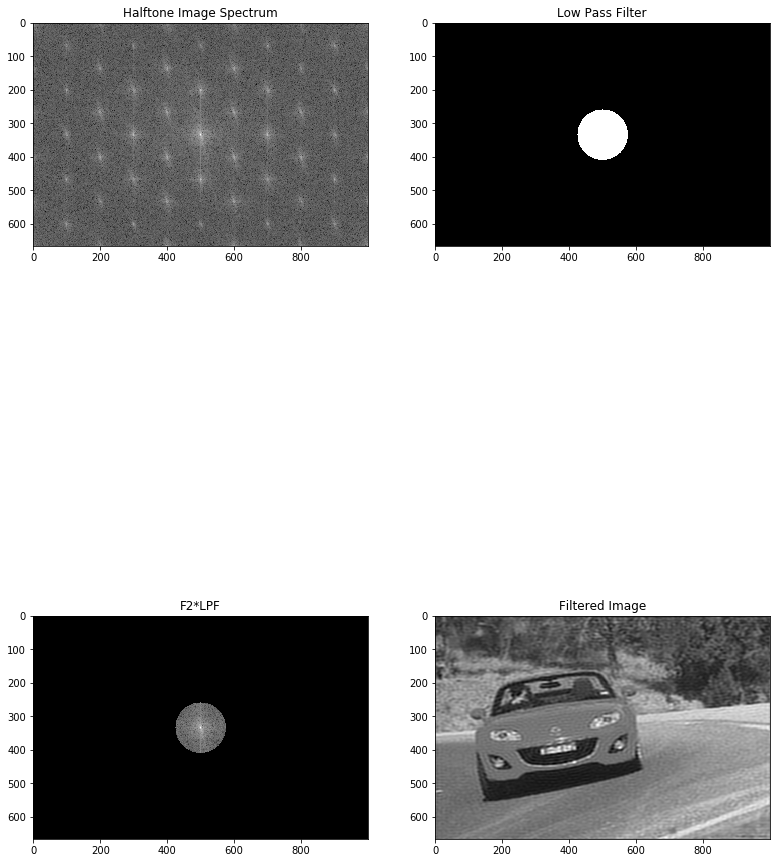

In [16]:
LPF = cria_filtro_ideal(f2,0,75) #create a LPF

F = np.fft.fft2(f2) #apply fft to original image
G = F * LPF #multiply the fft of original image witht the LPF (Convolution in time == mulitplication in frequency)
F2 = np.fft.ifft2(G) #get inverse fft of the filtered image (obtain filtered image in time domain)

#show the magnitude spectrum, the filter, there product, and the output image
plt.subplots(2,2, figsize=(13.2,20))

plt.subplot(221)
plt.title('Halftone Image Spectrum')
plt.imshow(ia.dftview(F), cmap = 'gray')

plt.subplot(222)
plt.title('Low Pass Filter')
plt.imshow(np.fft.fftshift(LPF), cmap = 'gray')

plt.subplot(223)
plt.title('F2*LPF')
plt.imshow(ia.dftview(G), cmap = 'gray')

plt.subplot(224)
plt.title('Filtered Image')
plt.imshow(F2.real.astype(np.float),cmap='gray');

As we can see, the low pass filter applied greatly increases the quality of the image. It works because as we can see comparing the original spectrum with the "F2 * BPF" spectrum, we eliminate the various high-frequency copies of the spectrum. Since we keep only low frequency, the result image, of course, is slightly blurred. But this is acceptable seeing as that despite a bit blurred, the result image is much better than the original. 

OBS: Here we chose a radius of 75 for the LPF because it neatly isolates the original spectrum from its high frequence copies, and loses as little information as possible (if we increase the size the image worsens, if we decrease the size, the image blurs more than necessary).

What we could also do, following the low pass filter, is apply a very small high pass filter, to very lightly sharpen the image. That is what we do below. It is important to remember, however, that wether or not you chose to do this, depends on your specific needs (as do the sizes of the filters).

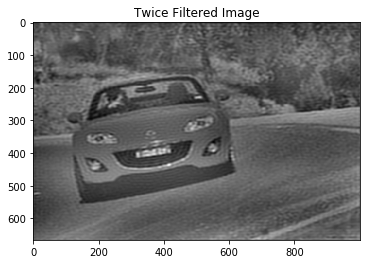

In [17]:
HPF = 1 - cria_filtro_ideal(f2,0,3) #create high pass filter

G = G * HPF #multiply the fft of original image witht the HPF (Convolution in time == mulitplication in frequency)
F3 = np.fft.ifft2(G) #get inverse fft of the filtered image (obtain filtered image in time domain)

plt.title('Twice Filtered Image')
plt.imshow(F3.real.astype(np.float),cmap='gray');